<a href="https://colab.research.google.com/github/dkomlen/finance-ml/blob/main/yield_curve_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import quandl

#Import Model Packages 


#### Loading the data

In [4]:
quandl.ApiConfig.api_key  =  'hUNEytJdLshWyvz7D7Yg'

In [5]:
# pip install quandl

In [6]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)

In [7]:
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [8]:
treasury_df

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.18,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
2022-04-05,0.18,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
2022-04-06,0.21,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
dataset = treasury_df

#### 3.1. Descriptive Statistics

In [11]:
dataset.shape


(15054, 11)

In [12]:
set_option('display.width', 100)
dataset.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2022-04-04,0.18,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
2022-04-05,0.18,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
2022-04-06,0.21,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63
2022-04-07,0.21,0.68,1.15,1.78,2.47,2.66,2.70,2.73,2.66,2.87,2.69
2022-04-08,0.20,0.70,1.19,1.81,2.53,2.73,2.76,2.79,2.72,2.94,2.76


In [13]:
set_option('precision', 3)
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5176.000,10152.00,10152.000,15054.000,11462.000,15054.000,15054.000,13184.000,15054.000,13365.000,11284.000
mean,1.175,3.77,3.951,4.917,5.036,5.330,5.594,5.951,5.933,5.963,6.332
std,1.450,3.25,3.365,3.456,3.810,3.338,3.203,3.266,2.992,2.907,3.052
min,0.000,0.00,0.020,0.040,0.090,0.100,0.190,0.360,0.520,0.870,0.990
25%,0.060,0.49,0.650,2.120,1.530,2.630,3.120,3.110,3.920,4.060,3.910
50%,0.440,3.55,3.725,4.990,4.885,5.380,5.545,6.100,5.730,5.490,5.820
75%,1.780,5.78,6.020,6.890,7.510,7.320,7.540,7.890,7.680,7.470,8.280
max,5.270,17.01,17.430,17.310,16.950,16.590,16.270,16.050,15.840,15.780,15.210


### 3.2. Data Visualization

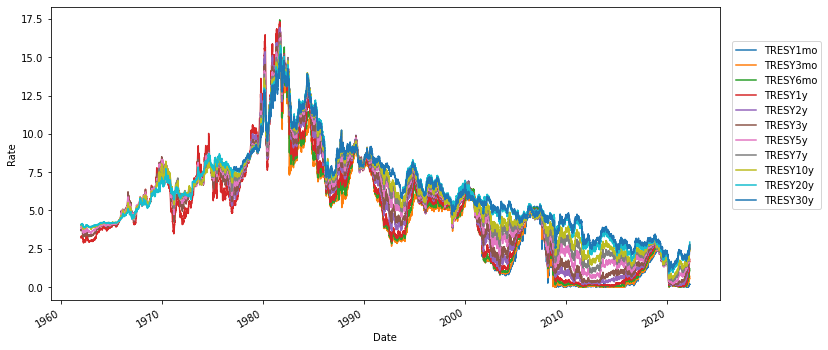

In [29]:
dataset.plot(figsize=(12,6))
plt.ylabel('Rate')
plt.legend(loc=2, bbox_to_anchor=(1.01, 0.9),)
plt.show()

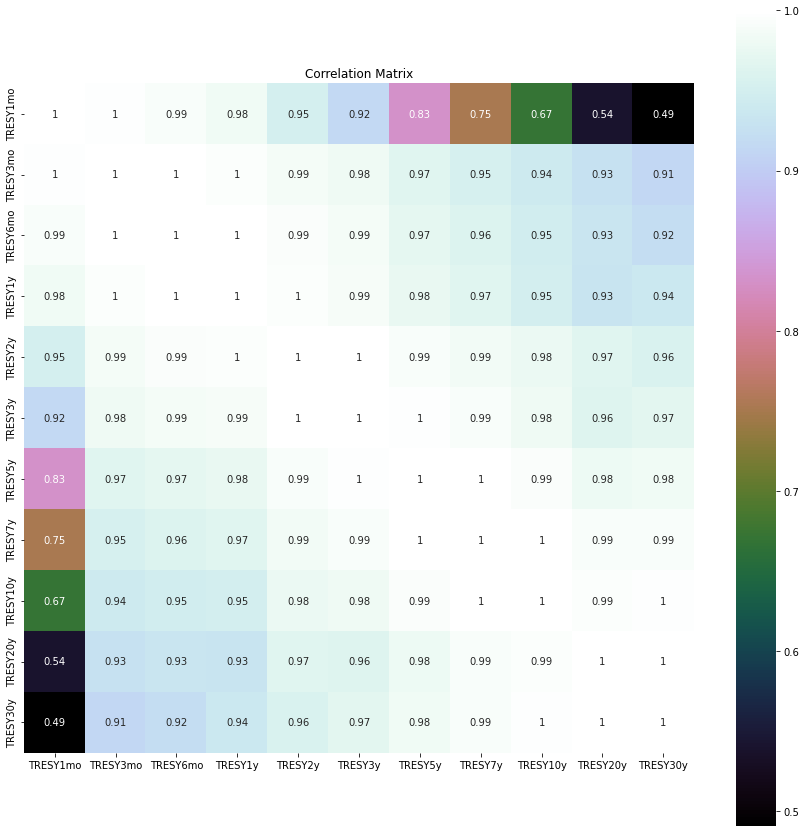

In [30]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

### 4. Data Preparation

#### 4.1 Data Cleaning

In [36]:
dataset.isna().sum()

TRESY1mo    9878
TRESY3mo    4902
TRESY6mo    4902
TRESY1y        0
TRESY2y     3592
TRESY3y        0
TRESY5y        0
TRESY7y     1870
TRESY10y       0
TRESY20y    1689
TRESY30y    3770
dtype: int64

In [37]:
dataset.isna().values.sum()

30603

In [40]:
dataset.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [42]:
dataset = dataset.fillna(method='ffill')
dataset = dataset.dropna(axis=0)

In [43]:
dataset.isna().values.sum()

0

In [44]:
dataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53


In [45]:
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000,5176.000
mean,1.175,1.229,1.334,1.441,1.675,1.903,2.348,2.703,3.019,3.573,3.706
std,1.450,1.472,1.503,1.475,1.410,1.359,1.283,1.228,1.197,1.245,1.149
min,0.000,0.000,0.020,0.040,0.090,0.100,0.190,0.360,0.520,0.870,0.990
25%,0.060,0.080,0.140,0.200,0.500,0.850,1.390,1.740,2.030,2.580,2.860
50%,0.440,0.530,0.830,1.020,1.270,1.520,2.030,2.460,2.840,3.390,3.630
75%,1.780,1.860,2.000,2.240,2.550,2.750,3.260,3.720,4.100,4.740,4.700
max,5.270,5.190,5.330,5.300,5.290,5.260,5.230,5.290,5.440,6.050,5.920


#### 4.2 Data Transformation

In [52]:
from matplotlib import scale
scaler = StandardScaler().fit(dataset)
scaler.fit_transform(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns, index=dataset.index)

In [53]:
rescaledDataset.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,1.721,1.570,1.421,1.417,1.500,1.587,1.731,1.757,1.713,1.636,1.571
2001-08-01,1.707,1.564,1.421,1.437,1.528,1.609,1.770,1.790,1.747,1.652,1.589
2001-08-02,1.707,1.564,1.415,1.444,1.571,1.668,1.825,1.847,1.797,1.692,1.623
2001-08-03,1.693,1.557,1.421,1.444,1.585,1.705,1.848,1.863,1.822,1.708,1.641
2001-08-06,1.686,1.557,1.421,1.437,1.564,1.668,1.840,1.863,1.814,1.708,1.641


In [54]:
rescaledDataset.isna().sum()

TRESY1mo    0
TRESY3mo    0
TRESY6mo    0
TRESY1y     0
TRESY2y     0
TRESY3y     0
TRESY5y     0
TRESY7y     0
TRESY10y    0
TRESY20y    0
TRESY30y    0
dtype: int64

In [58]:
set_option('precision', 3)
rescaledDataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03
mean,1.804e-15,1.744e-15,2.303e-15,-1.002e-15,5.455e-16,-1.442e-14,1.401e-15,-1.268e-15,7.228e-16,-6.193e-16,-1.656e-15
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-8.104e-01,-8.348e-01,-8.748e-01,-9.501e-01,-1.124e+00,-1.326e+00,-1.682e+00,-1.909e+00,-2.088e+00,-2.172e+00,-2.365e+00
25%,-7.690e-01,-7.804e-01,-7.949e-01,-8.415e-01,-8.332e-01,-7.745e-01,-7.467e-01,-7.844e-01,-8.263e-01,-7.981e-01,-7.362e-01
50%,-5.069e-01,-4.747e-01,-3.357e-01,-2.854e-01,-2.871e-01,-2.815e-01,-2.480e-01,-1.979e-01,-1.496e-01,-1.473e-01,-6.578e-02
75%,4.173e-01,4.289e-01,4.429e-01,5.420e-01,6.207e-01,6.235e-01,7.104e-01,8.286e-01,9.030e-01,9.372e-01,8.659e-01
max,2.824e+00,2.691e+00,2.659e+00,2.617e+00,2.564e+00,2.470e+00,2.245e+00,2.108e+00,2.022e+00,1.990e+00,1.928e+00


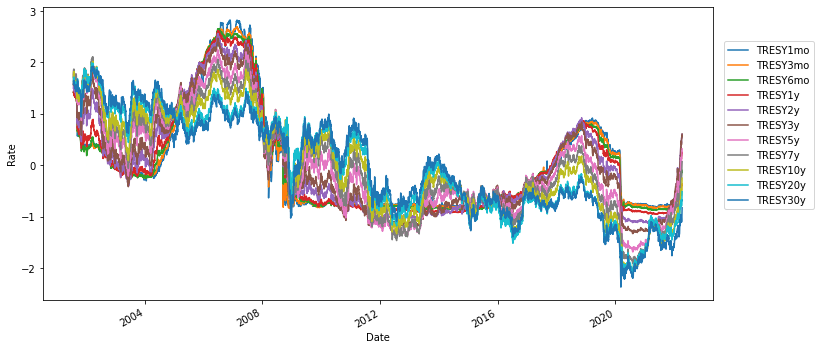

In [59]:
rescaledDataset.plot(figsize=(12,6))
plt.ylabel('Rate')
plt.legend(loc=2, bbox_to_anchor=(1.01, 0.9),)
plt.show()

### 5. Evaluating Algorithm and Models

#### 5.2 Model Evaluation - Applying PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponent = pca.fit(rescaledDataset)

In [62]:
pca.explained_variance_ratio_

array([8.47394109e-01, 1.40732618e-01, 9.52532038e-03, 1.26673261e-03,
       4.87848850e-04, 3.51569886e-04, 1.07509423e-04, 6.15510871e-05,
       3.43159024e-05, 2.26364195e-05, 1.57889228e-05])

#### 5.2.1. Explained Variance using PCA

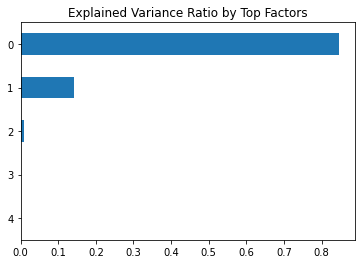

In [64]:
NumEigenvalues=5
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors');


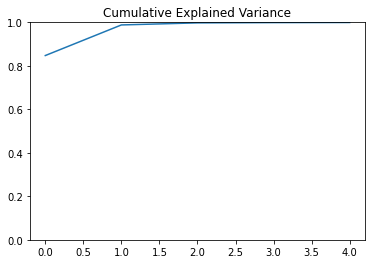

In [65]:
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1), title='Cumulative Explained Variance');


In [70]:
pca.components_

array([[ 0.2973779 ,  0.29949067,  0.30215382,  0.30809683,  0.31786544,
         0.32268499,  0.32229155,  0.31321953,  0.29922241,  0.2701739 ,
         0.25686727],
       [ 0.31489046,  0.31405279,  0.30437818,  0.26929692,  0.17340288,
         0.07994233, -0.09697681, -0.22099574, -0.32502977, -0.44790997,
        -0.48587785],
       [-0.40909551, -0.31500349, -0.18803566, -0.00247814,  0.29549313,
         0.42116687,  0.38667545,  0.26286732,  0.01158422, -0.24050716,
        -0.39592596],
       [-0.5189565 , -0.14911732,  0.23754212,  0.41798963,  0.35887413,
         0.0825011 , -0.29757101, -0.39617309, -0.10267369,  0.18865945,
         0.22377136],
       [-0.24619837,  0.04386058,  0.3361738 ,  0.17017497, -0.25977593,
        -0.30508375, -0.03031001,  0.12305693,  0.41285032,  0.31859687,
        -0.58899879],
       [ 0.29674759, -0.08507334, -0.27489409, -0.1298239 ,  0.18240223,
         0.22096486, -0.06189621, -0.20955953, -0.25795696,  0.69453213,
        -0.365

#### 5.2.2. Intuition Behind the principal components

In [71]:
def PCWeights():
  weights = pd.DataFrame()

  for i in range(len(pca.components_)):
    weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

  weights = weights.values.T
  return weights

weights = PCWeights()

In [75]:
NumComponents = 3
topPortfolios = pd.DataFrame(weights[:NumComponents], columns = dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

topPortfolios

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Principal Component 1,0.090,0.090,0.091,0.093,0.096,0.098,0.097,0.095,0.090,0.082,0.078
Principal Component 2,-2.606,-2.599,-2.519,-2.229,-1.435,-0.662,0.803,1.829,2.690,3.707,4.021
Principal Component 3,2.361,1.818,1.085,0.014,-1.706,-2.431,-2.232,-1.517,-0.067,1.388,2.285


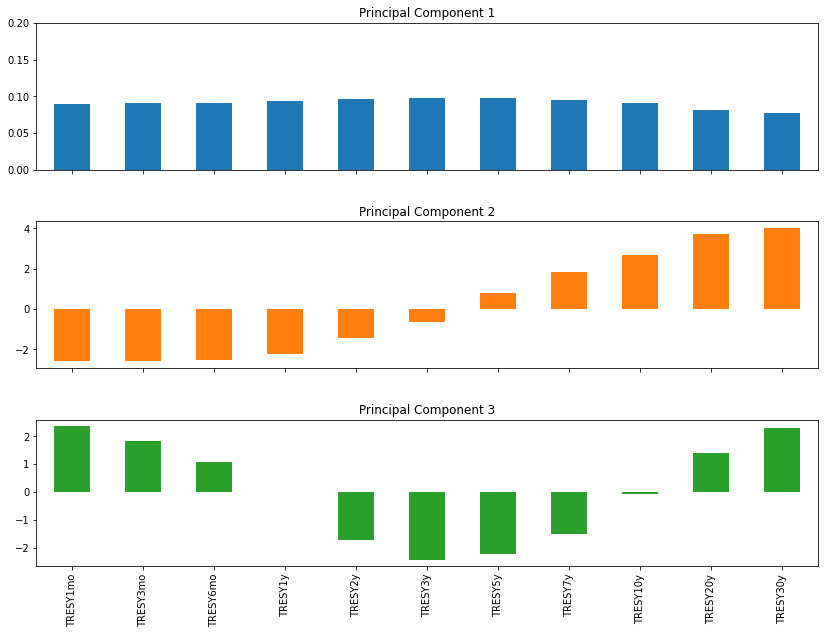

In [76]:
axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

### 5.2.3 Reconstructing the curve using PCA

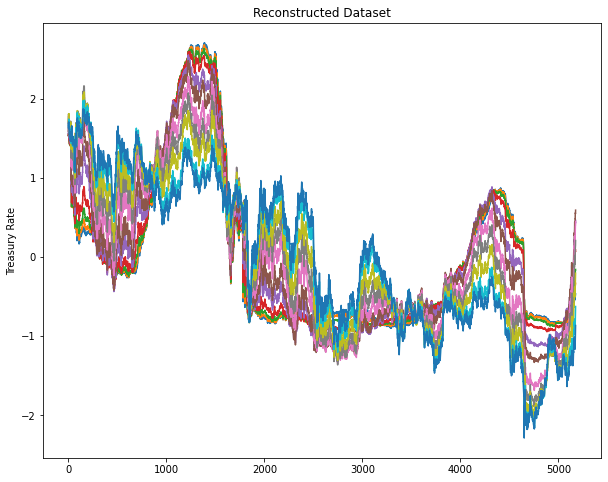

In [77]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(10,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()

In [78]:
reconst

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
0,1.551,1.541,1.531,1.534,1.556,1.588,1.660,1.685,1.706,1.653,1.632
1,1.542,1.536,1.531,1.543,1.580,1.621,1.696,1.721,1.734,1.674,1.647
2,1.533,1.533,1.535,1.559,1.618,1.671,1.755,1.779,1.784,1.715,1.680
3,1.525,1.527,1.533,1.564,1.635,1.694,1.782,1.806,1.806,1.732,1.693
4,1.523,1.523,1.527,1.554,1.618,1.675,1.766,1.793,1.800,1.733,1.698
...,...,...,...,...,...,...,...,...,...,...,...
5171,-0.491,-0.359,-0.188,0.044,0.382,0.480,0.282,0.006,-0.432,-0.878,-1.123
5172,-0.501,-0.362,-0.181,0.067,0.437,0.555,0.376,0.106,-0.338,-0.790,-1.043
5173,-0.481,-0.346,-0.170,0.072,0.436,0.554,0.387,0.130,-0.297,-0.732,-0.977
5174,-0.477,-0.346,-0.173,0.065,0.426,0.546,0.393,0.149,-0.262,-0.681,-0.918
